In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Import data and Change to CM and KG
df = pd.read_csv('./height_and_weight_dataset.csv')
df.drop(columns=['Index'], inplace=True)
df['Height(Inches)'] = df['Height(Inches)'].apply(lambda x: round(x * 2.54, 1))
df['Weight(Pounds)'] = df['Weight(Pounds)'].apply(lambda x: round(x * 0.453592, 1))
df.rename(columns={
    'Height(Inches)': 'height',
    'Weight(Pounds)': 'weight'
}, inplace=True)

In [3]:
# Print 5 First Data
df.head()

height  weight
0   167.1    51.3
1   181.6    61.9
2   176.3    69.4
3   173.3    64.6
4   172.2    65.5

In [4]:
# Print 5 Last Data
df.tail()

height  weight
24995   176.5    53.5
24996   164.0    54.5
24997   164.3    53.6
24998   171.5    60.0
24999   174.9    56.6

In [5]:
# Total Data and Features
print('Total Data:', df.shape[0])
print('Total Features:', df.shape[1])

Total Data: 25000
Total Features: 2


In [6]:
# Check Data Types
df.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  25000 non-null  float64
 1   weight  25000 non-null  float64
dtypes: float64(2)

In [7]:
# Describe Statistic Data
df.describe()

height        weight
count  25000.000000  25000.000000
mean     172.702456     57.641960
std        4.830493      5.289508
min      153.100000     35.400000
25%      169.400000     54.100000
50%      172.700000     57.700000
75%      176.000000     61.200000
max      190.900000     77.500000

In [8]:
# Check Missing Values
print('Total Missing Values:', df.isna().sum().sum())

Total Missing Values: 0


[]

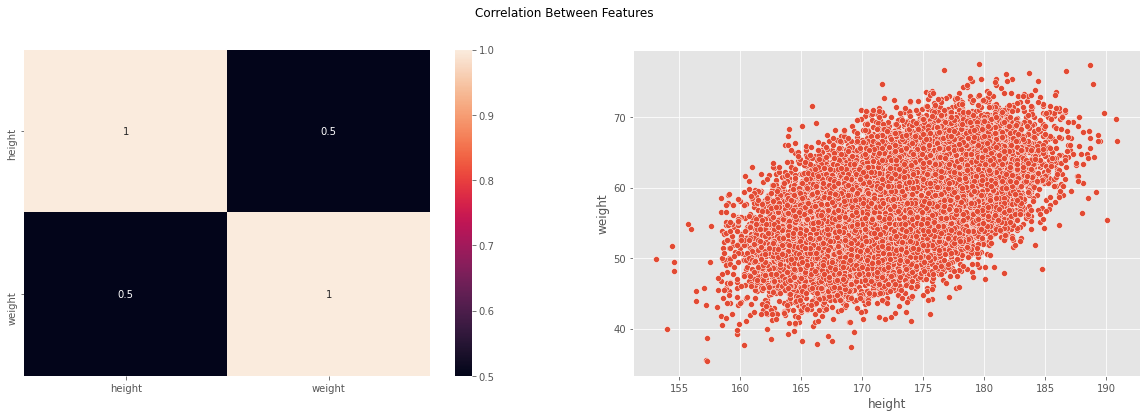

In [9]:
# Check Correlation of data
plt.style.use('ggplot')
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.heatmap(df.corr().round(2), annot=True, ax=axs[0])
sns.scatterplot(x=df['height'], y=df['weight'], ax=axs[1])
fig.suptitle('Correlation Between Features')
plt.plot()

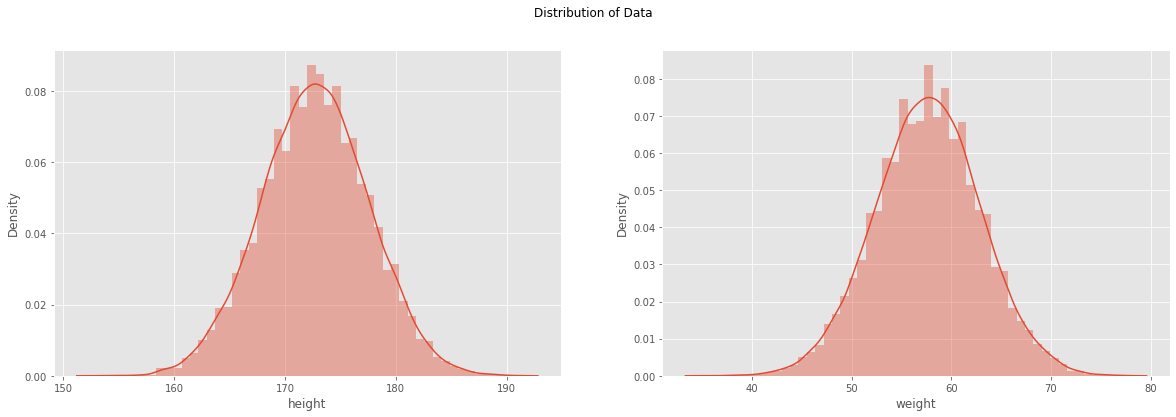

In [10]:
# Checking of Distribution
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
for i, column in enumerate(df.columns):
    sns.distplot(df[column], ax=axs[i])

fig.suptitle('Distribution of Data')
plt.show()

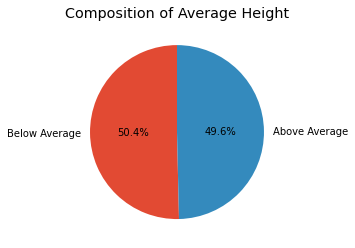

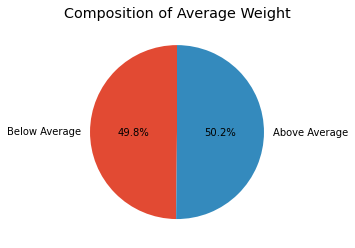

In [11]:
# Composition Data Below Average
labels = ['Below Average', 'Above Average']
sizes_height = [df[df['height'] < df['height'].mean()].shape[0], df[df['height'] > df['height'].mean()].shape[0]]
sizes_weight = [df[df['weight'] < df['weight'].mean()].shape[0], df[df['weight'] > df['weight'].mean()].shape[0]]
plt.title('Composition of Average Height')
plt.pie(sizes_height, labels=labels, autopct='%.1f%%', pctdistance=0.5, startangle=90)
plt.show()
plt.title('Composition of Average Weight')
plt.pie(sizes_weight, labels=labels, autopct='%.1f%%', pctdistance=0.5, startangle=90)
plt.show()

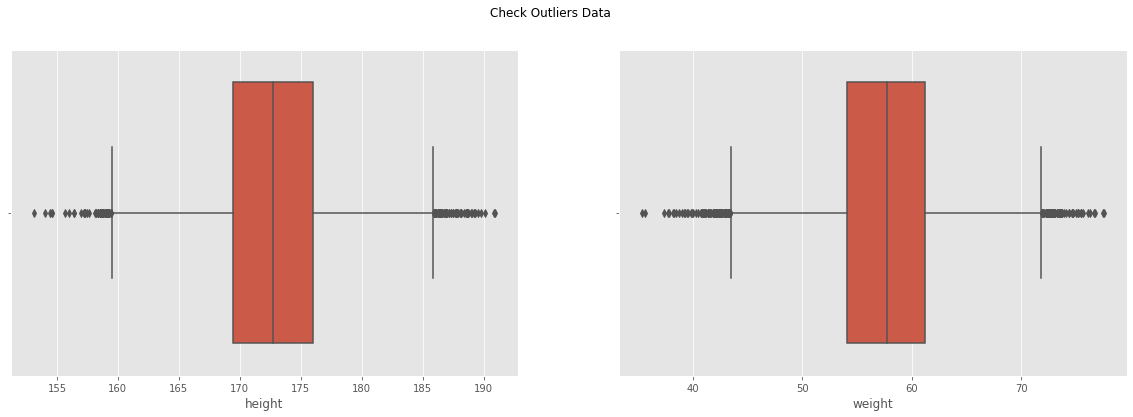

In [12]:
# Check for Outliers
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
for i, column in enumerate(df.columns):
    sns.boxplot(df[column], ax=axs[i])

fig.suptitle('Check Outliers Data')
plt.show()

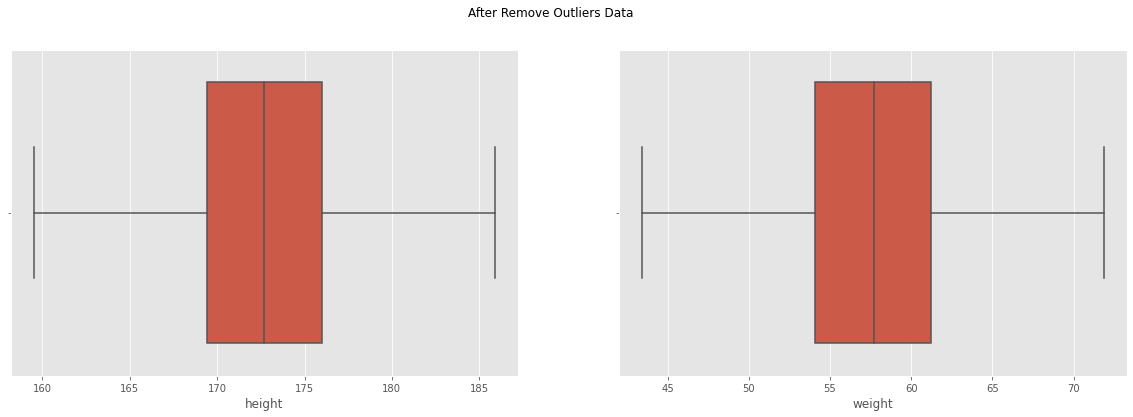

Before Remove Outliers Data: 25000
After Remove Outliers Data: 25000
Total Missing Values: 0


In [13]:
# Remove Outliers Data
before_remove_outliers = df.shape[0]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)
more_than = (df > maximum)
lower_than = (df < minimum)
df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
for i, column in enumerate(df.columns):
    sns.boxplot(df[column], ax=axs[i])

fig.suptitle('After Remove Outliers Data')
plt.show()
print('Before Remove Outliers Data:', before_remove_outliers)
print('After Remove Outliers Data:', df.shape[0])
print('Total Missing Values:', df.isna().sum().sum())

In [14]:
# Remove Duplicates Data
before_remove_data = df.shape[0]
df = df.drop_duplicates()
print('Total Data Before Delete Duplicates Data:', before_remove_data)
print('Total Data After Delete Duplicates Data:', df.shape[0])

Total Data Before Delete Duplicates Data: 25000
Total Data After Delete Duplicates Data: 17028


In [15]:
# Separate Data
height = df[['height']]
weight = df[['weight']]
print('Total Data Height:', height.shape[0])
print('Total Data Weight:', weight.shape[0])

Total Data Height: 17028
Total Data Weight: 17028


In [16]:
# Change Scale Data
scaler_height = MinMaxScaler().fit(height)
height = scaler_height.transform(height)
scaler_weight = MinMaxScaler().fit(weight)
weight = scaler_weight.transform(weight)
print('Scaler Height\n', height)
print('\nScaler Weight\n', weight)

Scaler Height
 [[0.28787879]
 [0.83712121]
 [0.63636364]
 ...
 [0.87878788]
 [0.17045455]
 [0.58333333]]

Scaler Weight
 [[0.27640845]
 [0.64964789]
 [0.91373239]
 ...
 [0.5193662 ]
 [0.38908451]
 [0.46302817]]


In [17]:
# Split Data
height_train, height_test, weight_train, weight_test = train_test_split(height, weight, 
                                                                        test_size=0.3, random_state=69)
print('Total Height Train:', height_train.shape[0])
print('Total Height Test:', height_test.shape[0])
print('Total Weight Train:', weight_train.shape[0])
print('Total Weight Test:', weight_test.shape[0])

Total Height Train: 11919
Total Height Test: 5109
Total Weight Train: 11919
Total Weight Test: 5109


In [18]:
# Make Model
model_weight = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='linear'),
])
model_weight.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['mae']
)
model_height = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='linear'),
])
model_height.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['mae']
)
model_weight.summary()
model_height.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               256       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 17,409
Trainable params: 17,153
Non-trainable params: 256
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                

In [19]:
# Make Callbacks
callback_earlystopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
)

In [20]:
# Train Model Weight
tf.keras.backend.manual_variable_initialization(True)
hist_weight = model_weight.fit(
    height_train, weight_train,
    validation_data=(height_test, weight_test),
    epochs=100,
    verbose=2,
    callbacks=[callback_earlystopping]
)

Epoch 1/100
373/373 - 3s - loss: 0.0614 - mae: 0.1737 - val_loss: 0.0373 - val_mae: 0.1577
Epoch 2/100
373/373 - 1s - loss: 0.0340 - mae: 0.1499 - val_loss: 0.0329 - val_mae: 0.1477
Epoch 3/100
373/373 - 1s - loss: 0.0342 - mae: 0.1502 - val_loss: 0.0318 - val_mae: 0.1451
Epoch 4/100
373/373 - 1s - loss: 0.0337 - mae: 0.1493 - val_loss: 0.0317 - val_mae: 0.1449
Epoch 5/100
373/373 - 1s - loss: 0.0337 - mae: 0.1492 - val_loss: 0.0320 - val_mae: 0.1456
Epoch 6/100
373/373 - 1s - loss: 0.0341 - mae: 0.1502 - val_loss: 0.0338 - val_mae: 0.1497
Epoch 7/100
373/373 - 1s - loss: 0.0336 - mae: 0.1488 - val_loss: 0.0312 - val_mae: 0.1437
Epoch 8/100
373/373 - 1s - loss: 0.0337 - mae: 0.1492 - val_loss: 0.0326 - val_mae: 0.1470
Epoch 9/100
373/373 - 1s - loss: 0.0337 - mae: 0.1493 - val_loss: 0.0311 - val_mae: 0.1433
Epoch 10/100
373/373 - 1s - loss: 0.0337 - mae: 0.1494 - val_loss: 0.0312 - val_mae: 0.1437
Epoch 11/100
373/373 - 1s - loss: 0.0338 - mae: 0.1492 - val_loss: 0.0318 - val_mae: 0.14

In [21]:
# Train Model Height
tf.keras.backend.manual_variable_initialization(True)
hist_height = model_height.fit(
    weight_train, height_train,
    validation_data=(weight_test, height_test),
    epochs=100,
    verbose=2,
    callbacks=[callback_earlystopping]
)

Epoch 1/100
373/373 - 2s - loss: 0.0589 - mae: 0.1712 - val_loss: 0.0356 - val_mae: 0.1535
Epoch 2/100
373/373 - 1s - loss: 0.0327 - mae: 0.1471 - val_loss: 0.0322 - val_mae: 0.1457
Epoch 3/100
373/373 - 1s - loss: 0.0328 - mae: 0.1476 - val_loss: 0.0297 - val_mae: 0.1397
Epoch 4/100
373/373 - 1s - loss: 0.0326 - mae: 0.1469 - val_loss: 0.0308 - val_mae: 0.1424
Epoch 5/100
373/373 - 1s - loss: 0.0328 - mae: 0.1475 - val_loss: 0.0303 - val_mae: 0.1412
Epoch 6/100
373/373 - 1s - loss: 0.0330 - mae: 0.1483 - val_loss: 0.0300 - val_mae: 0.1404
Epoch 7/100
373/373 - 1s - loss: 0.0325 - mae: 0.1465 - val_loss: 0.0305 - val_mae: 0.1417
Epoch 8/100
373/373 - 1s - loss: 0.0326 - mae: 0.1471 - val_loss: 0.0298 - val_mae: 0.1398
Epoch 9/100
373/373 - 1s - loss: 0.0326 - mae: 0.1470 - val_loss: 0.0309 - val_mae: 0.1425
Epoch 10/100
373/373 - 1s - loss: 0.0324 - mae: 0.1464 - val_loss: 0.0304 - val_mae: 0.1413
Epoch 11/100
373/373 - 1s - loss: 0.0325 - mae: 0.1468 - val_loss: 0.0298 - val_mae: 0.13

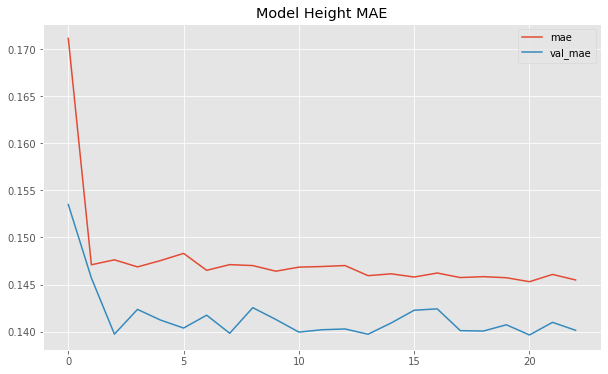

In [22]:
# Plot MAE Model Height
plt.figure(figsize=(10, 6))
plt.plot(hist_height.history['mae'])
plt.plot(hist_height.history['val_mae'])
plt.title('Model Height MAE')
plt.legend(['mae', 'val_mae'])
plt.show()

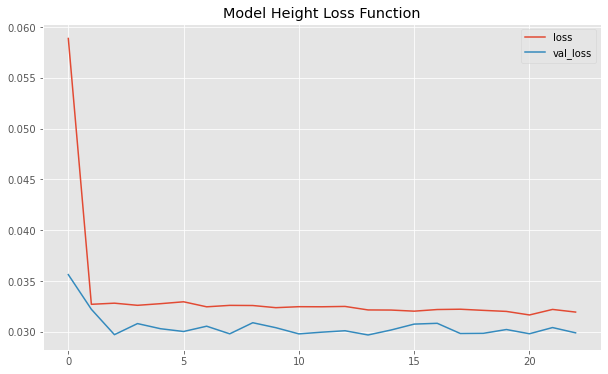

In [23]:
# Plot LOSS Model Height
plt.figure(figsize=(10, 6))
plt.plot(hist_height.history['loss'])
plt.plot(hist_height.history['val_loss'])
plt.title('Model Height Loss Function')
plt.legend(['loss', 'val_loss'])
plt.show()

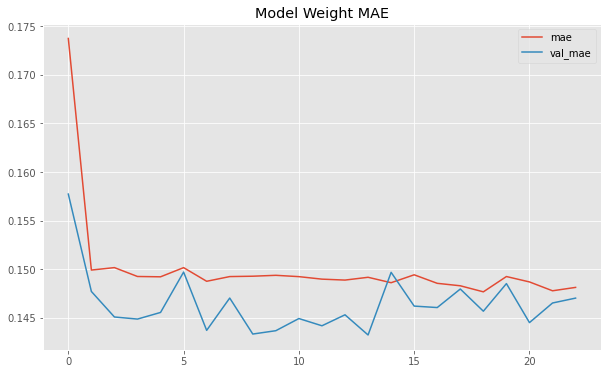

In [24]:
# Plot MAE Model Weight
plt.figure(figsize=(10, 6))
plt.plot(hist_weight.history['mae'])
plt.plot(hist_weight.history['val_mae'])
plt.title('Model Weight MAE')
plt.legend(['mae', 'val_mae'])
plt.show()

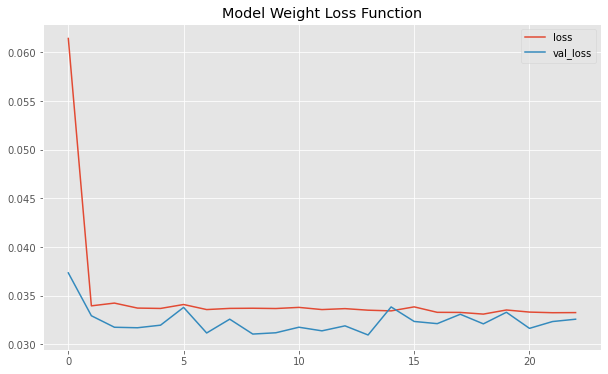

In [25]:
# Plot LOSS Model Weight
plt.figure(figsize=(10, 6))
plt.plot(hist_weight.history['loss'])
plt.plot(hist_weight.history['val_loss'])
plt.title('Model Weight Loss Function')
plt.legend(['loss', 'val_loss'])
plt.show()

In [26]:
# Predict Data
data_height = {
    'height': [167.1]
}
data_weight = {
    'weight': [51.3]
}
predict_weight = pd.DataFrame(data_height)
predict_height = pd.DataFrame(data_weight)

scaler_predict_weight = scaler_height.transform(predict_weight)
scaler_predict_height = scaler_weight.transform(predict_height)

predict_weight = model_weight.predict(scaler_predict_weight)
predict_height = model_height.predict(scaler_predict_height)

In [27]:
# Print Predict
print('Predict Weight')
print('Actual Value:', df.iloc[0, 1])
print('Predicted Value:', round(scaler_weight.inverse_transform(predict_weight)[0][0], 1))

print('\nPredict Height')
print('Actual Value:', df.iloc[0, 0])
print('Predicted Value:', round(scaler_height.inverse_transform(predict_height)[0][0], 1))

Predict Weight
Actual Value: 51.3
Predicted Value: 55.2

Predict Height
Actual Value: 167.1
Predicted Value: 170.1


In [28]:
# Saved Model
pickle.dump(scaler_height, open('./scaler_height.pickle', 'wb'))
pickle.dump(scaler_weight, open('./scaler_weight.pickle', 'wb'))
model_height.save('./model_predict_height.h5')
model_weight.save('./model_predict_weight.h5')